In [1]:
# Import required packages
import time
import xlsxwriter
import numpy as np
import pandas as pd
import datetime
from math import pi, ceil

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Import audio features dataset
df = pd.read_excel("KJ_songFeatures3.xlsx",
                   header=0)
print(df.shape, '\n', np.mean(df['popularity']))
df.head()

(2043, 22) 
 56.127263827704354


,artist,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,3 Doors Down,Here Without You,2002,0.536,0.550,10,-6.733,0,0.0248,0.05370,...,0.234,144.018,audio_features,3NLrRZoMF0Lx6zTlYqeIo4,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx...,https://api.spotify.com/v1/audio-analysis/3NLr...,238560,4,74
1,30 Seconds To Mars,Closer To The Edge,2009,0.502,0.948,6,-3.717,1,0.1210,0.00990,...,0.102,139.979,audio_features,0UZwcRQAk4QR09HtGRZhYC,spotify:track:0UZwcRQAk4QR09HtGRZhYC,https://api.spotify.com/v1/tracks/0UZwcRQAk4QR...,https://api.spotify.com/v1/audio-analysis/0UZw...,273467,4,57
2,30 Seconds To Mars,Kings and Queens,2009,0.293,0.816,8,-5.432,1,0.0844,0.04010,...,0.148,164.982,audio_features,4sjLcE0GQ6urc4iUXsUPe9,spotify:track:4sjLcE0GQ6urc4iUXsUPe9,https://api.spotify.com/v1/tracks/4sjLcE0GQ6ur...,https://api.spotify.com/v1/audio-analysis/4sjL...,347667,4,62
3,30 Seconds To Mars,The Kill,2005,0.309,0.912,4,-3.881,0,0.0646,0.00140,...,0.302,183.035,audio_features,0lP4HYLmvowOKdsQ7CVkuq,spotify:track:0lP4HYLmvowOKdsQ7CVkuq,https://api.spotify.com/v1/tracks/0lP4HYLmvowO...,https://api.spotify.com/v1/audio-analysis/0lP4...,231533,3,70
4,30 Seconds To Mars,Up In The Air,2013,0.483,0.862,11,-3.863,0,0.0857,0.00571,...,0.453,124.026,audio_features,0zqwz7SNny9fwqSDpIu4qN,spotify:track:0zqwz7SNny9fwqSDpIu4qN,https://api.spotify.com/v1/tracks/0zqwz7SNny9f...,https://api.spotify.com/v1/audio-analysis/0zqw...,275787,4,56


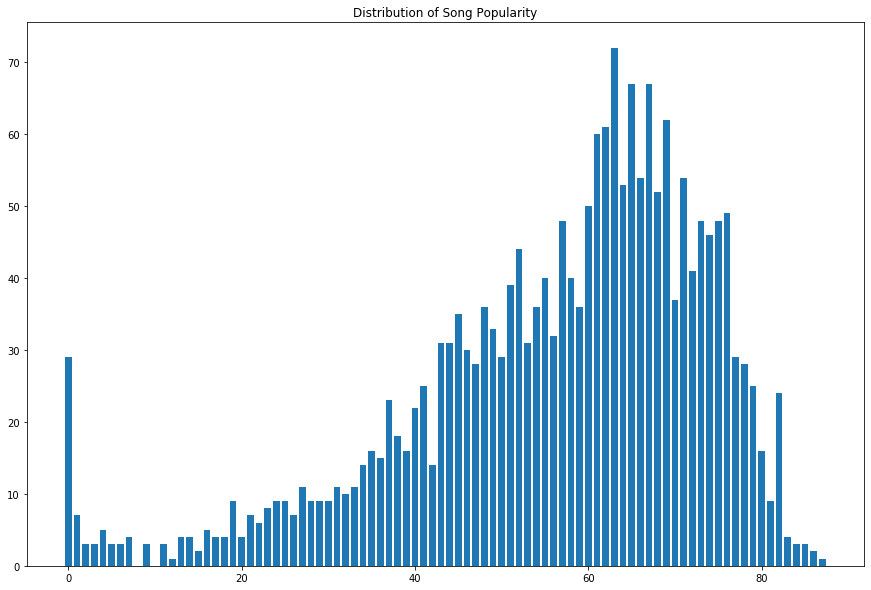

In [3]:
# Plot bar chart to show distribution of song popularity
df_popularity = pd.DataFrame({'score': df.popularity.value_counts().index.to_list()})
df_popularity['value_counts'] = df.popularity.value_counts().to_list()
df_popularity.sort_values(by=['score'],
                          axis=0,
                          ascending=True,
                          inplace=True)
df_popularity.reset_index(drop=True, inplace=True)

plt.figure(figsize=(15,10))
plt.bar(df_popularity['score'], df_popularity['value_counts'])
plt.title("Distribution of Song Popularity")
plt.show()

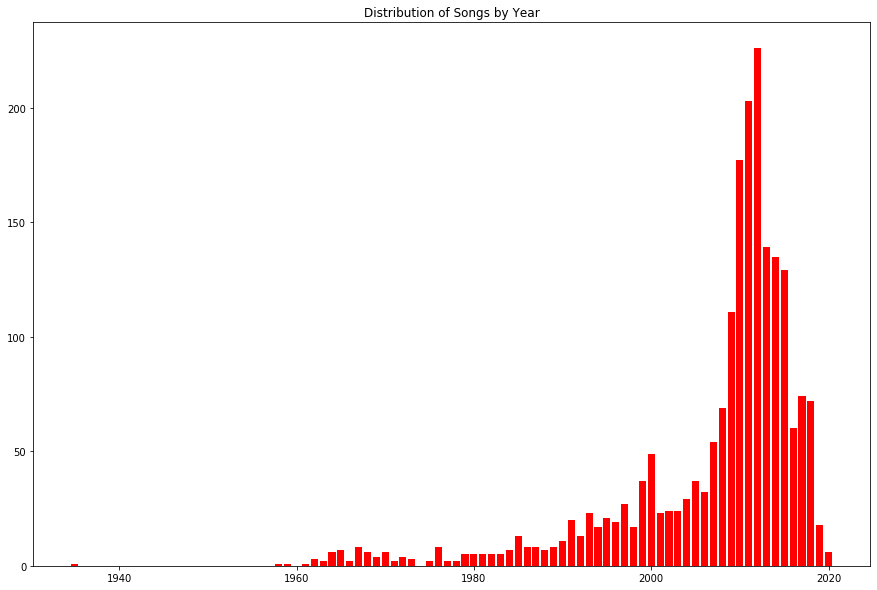

In [4]:
# Plot bar chart to show distribution of song by year
df_year = pd.DataFrame({'year': df.year.value_counts().index.to_list()})
df_year['value_counts'] = df.year.value_counts().to_list()
df_year.sort_values(by=['year'],
                    axis=0,
                    ascending=True,
                    inplace=True)
df_year.reset_index(drop=True, inplace=True)

plt.figure(figsize=(15,10))
plt.bar(df_year['year'], df_year['value_counts'], color='red')
plt.title("Distribution of Songs by Year")
plt.show()

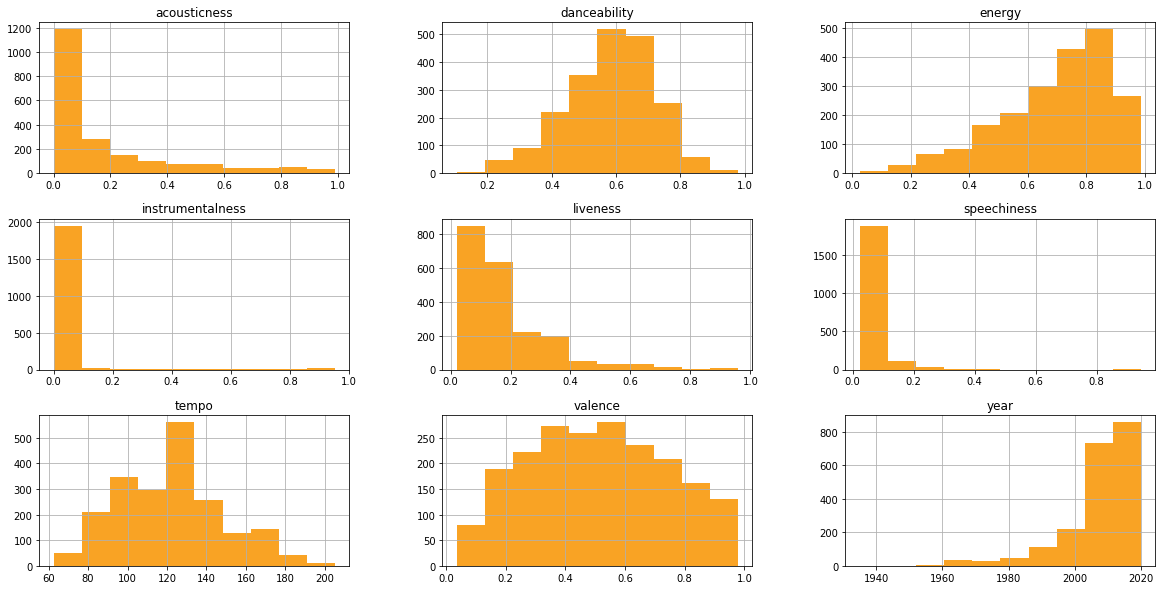

In [5]:
df[['acousticness', 'danceability', 'instrumentalness', 
    'energy', 'speechiness','tempo',
    'liveness', 'valence', 'year']].hist(figsize=(20,10), 
                                 color='#f9a324')
plt.show()

In [6]:
# Correlation Matrix
df[['acousticness', 'danceability', 'instrumentalness', 
    'energy', 'speechiness','tempo',
    'liveness', 'valence']].corr()

,acousticness,danceability,instrumentalness,energy,speechiness,tempo,liveness,valence
acousticness,1.000000,-0.160300,0.053918,-0.712749,-0.078275,-0.191230,-0.094705,-0.237377
danceability,-0.160300,1.000000,-0.003304,0.150614,0.060198,-0.218215,-0.056295,0.524154
instrumentalness,0.053918,-0.003304,1.000000,-0.111709,-0.028697,-0.012210,-0.019954,-0.068481
energy,-0.712749,0.150614,-0.111709,1.000000,0.204868,0.198472,0.166054,0.400068
speechiness,-0.078275,0.060198,-0.028697,0.204868,1.000000,0.142901,0.126724,0.139330
tempo,-0.191230,-0.218215,-0.012210,0.198472,0.142901,1.000000,0.036869,0.032858
liveness,-0.094705,-0.056295,-0.019954,0.166054,0.126724,0.036869,1.000000,0.040277
valence,-0.237377,0.524154,-0.068481,0.400068,0.139330,0.032858,0.040277,1.000000


In [7]:
# Features to be used in analysis
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
song_cluster = df[cluster_features]

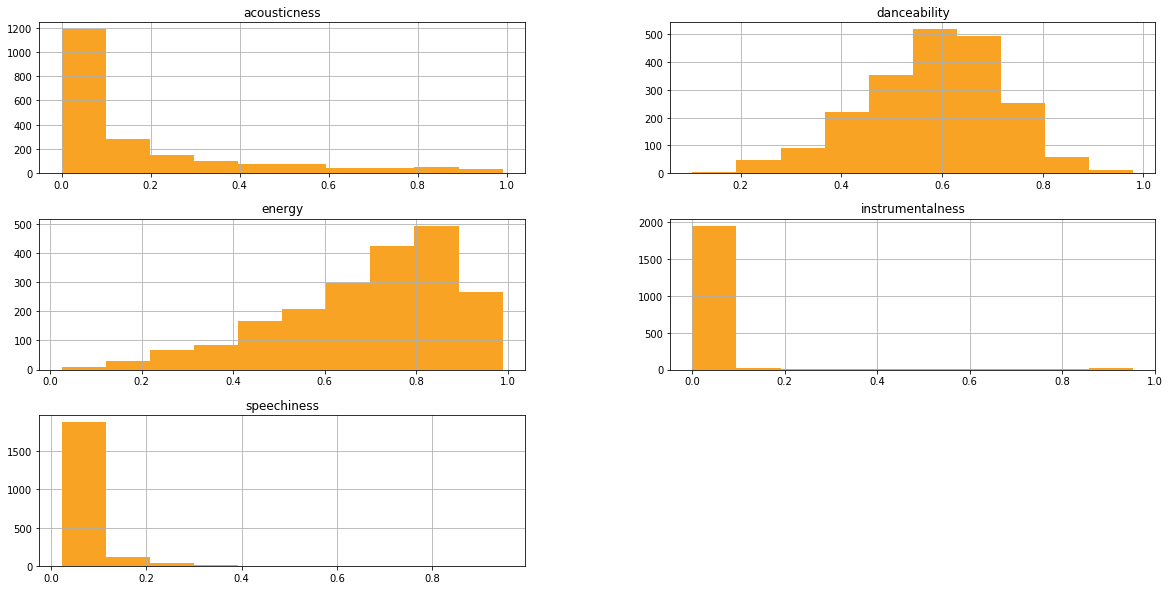

In [8]:
song_cluster.hist(figsize=(20,10), color='#f9a324')
plt.show()

In [10]:
# Feature scaling before fitting the model
X = np.array(song_cluster)
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

In [12]:
# Fitting the K-Means++ model with different n_cluster values for analysis
ss_dist = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)

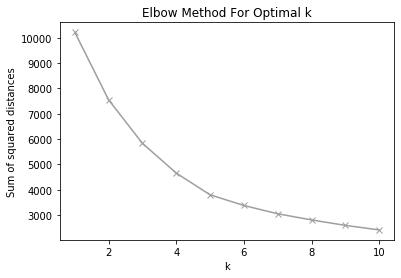

In [13]:
# Visual analysis of SDD errors across different n_clusters under k-means++
plt.plot(K, ss_dist, 'bx-', color='#9e9e9e')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
num_clusters = 5
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=123).fit(X)

In [16]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=4, random_state=123)
pca_results = pca.fit_transform(X)

In [18]:
# Analyzing Explained Variance Ratio after dimensionality reduction
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.9453018351453316


array([0.3689156 , 0.56883268, 0.76058417, 0.94530184])

In [19]:
df_scree = pd.DataFrame({'Component':['1', '2', '3', '4'], 'Indiv': pca.explained_variance_ratio_})
df_scree['cum_sum'] = df_scree['Indiv'].cumsum()
df_scree

,Component,Indiv,cum_sum
0,1,0.368916,0.368916
1,2,0.199917,0.568833
2,3,0.191751,0.760584
3,4,0.184718,0.945302


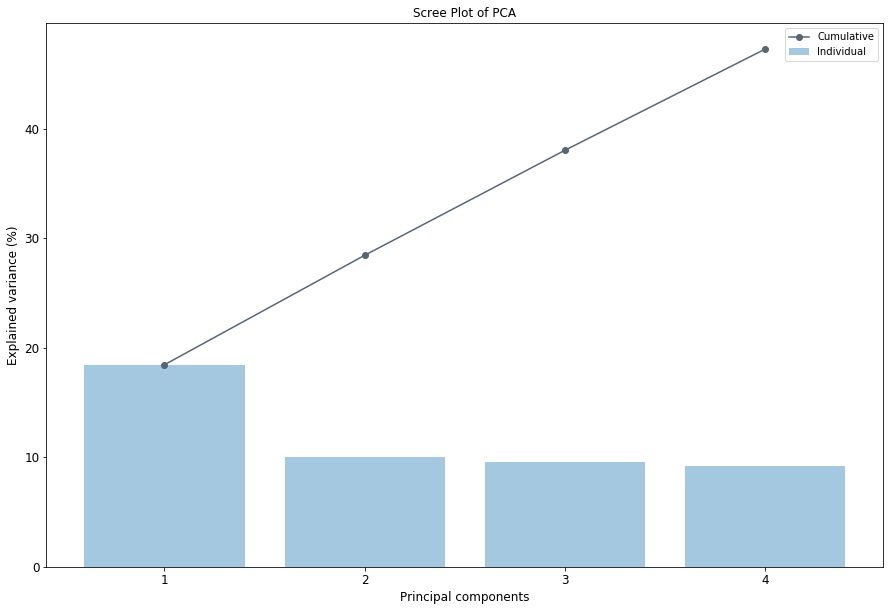

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 
        label='Individual', axes=ax, alpha=0.4)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), 
         label='Cumulative', color='#576574', axes=ax, marker='o')

ax.set_xticks(range(0,4))
ax.set_xticklabels(range(1,5), fontsize=12)
ax.set_yticklabels(range(0,90,10), fontsize=12)

plt.title('Scree Plot of PCA', fontsize=12)
plt.ylabel('Explained variance (%)', fontsize=12)
plt.xlabel('Principal components', fontsize=12)
plt.legend()
plt.show()

In [21]:
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3', 'PC4']
df_pca['label'] = kmeanModel.labels_
df_pca.head()

,PC1,PC2,PC3,PC4,label
0,0.405275,-0.244902,-0.690977,0.079223,1
1,-1.502525,-0.481483,0.819039,0.969688,1
2,-0.387995,-1.115475,0.132857,2.028770,1
3,-0.764960,-1.049284,-0.325991,2.006177,1
4,-1.008449,-0.500024,0.191773,0.916281,1


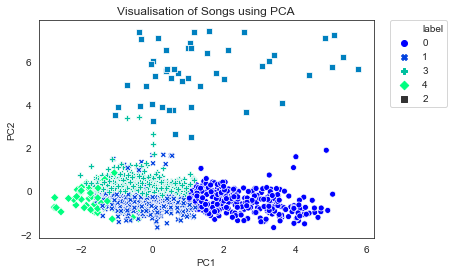

In [24]:
p = ['#DC4E76', '#CC4B93', '#A946BE', '#5C4AE4', '#35375A']
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

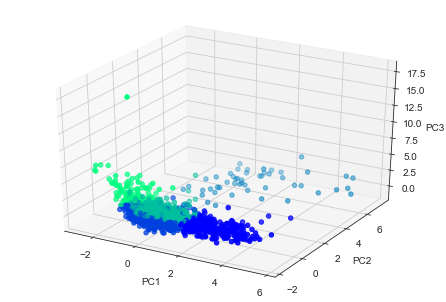

In [25]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap= 'winter')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [27]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=123, learning_rate=190)
tsne_results = tsne.fit_transform(X)

In [28]:
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = kmeanModel.labels_
df_tsne.head()

,D1,D2,label
0,15.660154,10.252874,1
1,-11.498966,-40.409706,1
2,21.607403,-21.156137,1
3,18.954243,-21.993015,1
4,8.888690,-28.013191,1


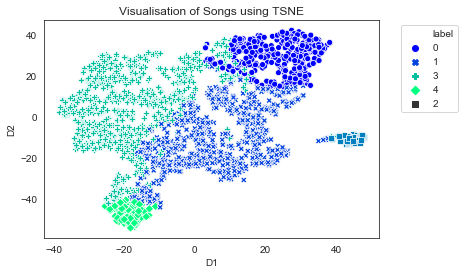

In [29]:
sns.set_style('white')
sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Visualisation of Songs using TSNE')
plt.show()

In [33]:
df['cluster'] = df_pca['label']
df.head()

,artist,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity,cluster
0,3 Doors Down,Here Without You,2002,0.536,0.550,10,-6.733,0,0.0248,0.05370,...,144.018,audio_features,3NLrRZoMF0Lx6zTlYqeIo4,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx...,https://api.spotify.com/v1/audio-analysis/3NLr...,238560,4,74,1
1,30 Seconds To Mars,Closer To The Edge,2009,0.502,0.948,6,-3.717,1,0.1210,0.00990,...,139.979,audio_features,0UZwcRQAk4QR09HtGRZhYC,spotify:track:0UZwcRQAk4QR09HtGRZhYC,https://api.spotify.com/v1/tracks/0UZwcRQAk4QR...,https://api.spotify.com/v1/audio-analysis/0UZw...,273467,4,57,1
2,30 Seconds To Mars,Kings and Queens,2009,0.293,0.816,8,-5.432,1,0.0844,0.04010,...,164.982,audio_features,4sjLcE0GQ6urc4iUXsUPe9,spotify:track:4sjLcE0GQ6urc4iUXsUPe9,https://api.spotify.com/v1/tracks/4sjLcE0GQ6ur...,https://api.spotify.com/v1/audio-analysis/4sjL...,347667,4,62,1
3,30 Seconds To Mars,The Kill,2005,0.309,0.912,4,-3.881,0,0.0646,0.00140,...,183.035,audio_features,0lP4HYLmvowOKdsQ7CVkuq,spotify:track:0lP4HYLmvowOKdsQ7CVkuq,https://api.spotify.com/v1/tracks/0lP4HYLmvowO...,https://api.spotify.com/v1/audio-analysis/0lP4...,231533,3,70,1
4,30 Seconds To Mars,Up In The Air,2013,0.483,0.862,11,-3.863,0,0.0857,0.00571,...,124.026,audio_features,0zqwz7SNny9fwqSDpIu4qN,spotify:track:0zqwz7SNny9fwqSDpIu4qN,https://api.spotify.com/v1/tracks/0zqwz7SNny9f...,https://api.spotify.com/v1/audio-analysis/0zqw...,275787,4,56,1


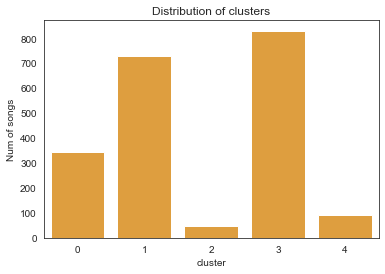

In [37]:
df.loc[:,'cluster'] = kmeanModel.labels_
df_cluster_size = df.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data= df_cluster_size, x='cluster', y='Num of songs', color='#f9a324')
plt.title('Distribution of clusters')
plt.show()

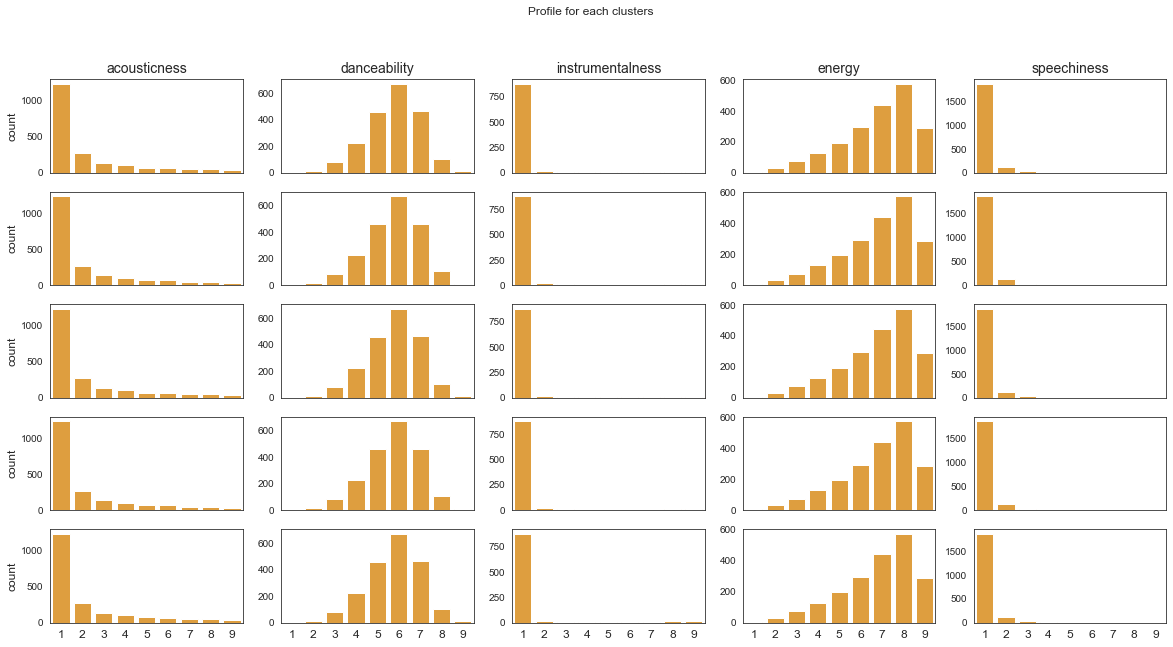

In [58]:
### Profiling each cluster
# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots
num_features = len(cluster_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df['cluster'].unique()):
#     filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df[df['cluster'] == cluster]
    col = 0
    
    for feature in cluster_features:
#         create binned count for all recent df and clustered df
        rec_grp = df.groupby(pd.cut(df[feature], bins)).size().reset_index(name='count')
        cluster_grp = song_cluster.groupby(pd.cut(song_cluster[feature], bins)).size().reset_index(name='count')
        
#         plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='#c8d6e5', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='#f9a324', ax=axes[row, col])
        
#         configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

In [38]:
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,acousticness,danceability,instrumentalness,energy,speechiness
0,0,0.582594,0.503945,0.005346,0.402654,0.037420
1,1,0.058008,0.490011,0.006329,0.782347,0.050797
2,2,0.228320,0.591469,0.733857,0.584449,0.048378
3,3,0.104241,0.694577,0.004610,0.739569,0.050726
4,4,0.124934,0.597989,0.000739,0.797849,0.237183


In [42]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

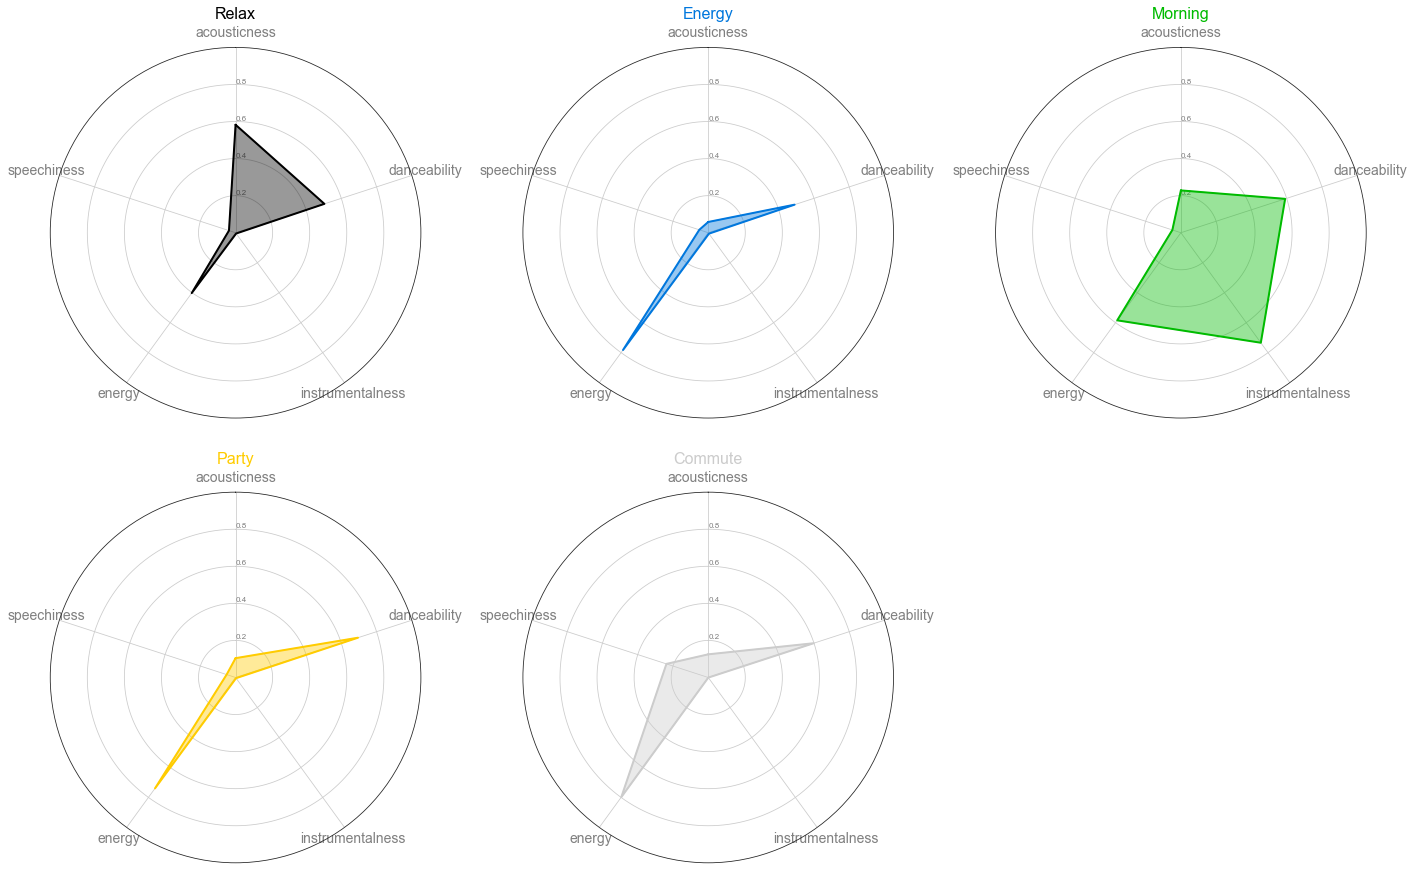

In [51]:
# initialize the figure
p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B'
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar.index))

# Create cluster name
title_list = ['Relax', 'Energy', 'Morning', 'Party', 'Commute']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()

In [53]:
cluster_num = 0
df_cluster1 = df[df['cluster'] == cluster_num]
df_cluster1.head()

,artist,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity,cluster
16,98 Degrees,I Do (Cherish You),1998,0.576,0.431,8,-9.484,1,0.0339,0.614,...,81.016,audio_features,0p5Bv16XNo5B7AdeKD0H0F,spotify:track:0p5Bv16XNo5B7AdeKD0H0F,https://api.spotify.com/v1/tracks/0p5Bv16XNo5B...,https://api.spotify.com/v1/audio-analysis/0p5B...,226733,4,57,0
19,A Great Big World,Say Something,2014,0.407,0.147,2,-8.822,1,0.0355,0.857,...,141.284,audio_features,6Vc5wAMmXdKIAM7WUoEb7N,spotify:track:6Vc5wAMmXdKIAM7WUoEb7N,https://api.spotify.com/v1/tracks/6Vc5wAMmXdKI...,https://api.spotify.com/v1/audio-analysis/6Vc5...,229400,3,77,0
20,A1,Caught In The Middle,2015,0.475,0.421,5,-9.413,1,0.0355,0.417,...,93.740,audio_features,5suh1rGJyspxhWwv0HDUQF,spotify:track:5suh1rGJyspxhWwv0HDUQF,https://api.spotify.com/v1/tracks/5suh1rGJyspx...,https://api.spotify.com/v1/audio-analysis/5suh...,211107,4,11,0
21,A1,Like A Rose,2015,0.571,0.292,9,-11.458,1,0.0410,0.803,...,127.855,audio_features,4sdU50FCGDF2CM2Lw9ocYd,spotify:track:4sdU50FCGDF2CM2Lw9ocYd,https://api.spotify.com/v1/tracks/4sdU50FCGDF2...,https://api.spotify.com/v1/audio-analysis/4sdU...,242160,4,26,0
39,Adele,Skyfall,2012,0.346,0.552,0,-6.864,0,0.0282,0.417,...,75.881,audio_features,6VObnIkLVruX4UVyxWhlqm,spotify:track:6VObnIkLVruX4UVyxWhlqm,https://api.spotify.com/v1/tracks/6VObnIkLVruX...,https://api.spotify.com/v1/audio-analysis/6VOb...,286480,4,74,0


In [54]:
cluster_num = 1
df_cluster2 = df[df['cluster'] == cluster_num]
df_cluster2.head()

,artist,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity,cluster
0,3 Doors Down,Here Without You,2002,0.536,0.550,10,-6.733,0,0.0248,0.05370,...,144.018,audio_features,3NLrRZoMF0Lx6zTlYqeIo4,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx...,https://api.spotify.com/v1/audio-analysis/3NLr...,238560,4,74,1
1,30 Seconds To Mars,Closer To The Edge,2009,0.502,0.948,6,-3.717,1,0.1210,0.00990,...,139.979,audio_features,0UZwcRQAk4QR09HtGRZhYC,spotify:track:0UZwcRQAk4QR09HtGRZhYC,https://api.spotify.com/v1/tracks/0UZwcRQAk4QR...,https://api.spotify.com/v1/audio-analysis/0UZw...,273467,4,57,1
2,30 Seconds To Mars,Kings and Queens,2009,0.293,0.816,8,-5.432,1,0.0844,0.04010,...,164.982,audio_features,4sjLcE0GQ6urc4iUXsUPe9,spotify:track:4sjLcE0GQ6urc4iUXsUPe9,https://api.spotify.com/v1/tracks/4sjLcE0GQ6ur...,https://api.spotify.com/v1/audio-analysis/4sjL...,347667,4,62,1
3,30 Seconds To Mars,The Kill,2005,0.309,0.912,4,-3.881,0,0.0646,0.00140,...,183.035,audio_features,0lP4HYLmvowOKdsQ7CVkuq,spotify:track:0lP4HYLmvowOKdsQ7CVkuq,https://api.spotify.com/v1/tracks/0lP4HYLmvowO...,https://api.spotify.com/v1/audio-analysis/0lP4...,231533,3,70,1
4,30 Seconds To Mars,Up In The Air,2013,0.483,0.862,11,-3.863,0,0.0857,0.00571,...,124.026,audio_features,0zqwz7SNny9fwqSDpIu4qN,spotify:track:0zqwz7SNny9fwqSDpIu4qN,https://api.spotify.com/v1/tracks/0zqwz7SNny9f...,https://api.spotify.com/v1/audio-analysis/0zqw...,275787,4,56,1


In [55]:
cluster_num = 2
df_cluster3 = df[df['cluster'] == cluster_num]
df_cluster3.head()

,artist,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity,cluster
32,Adam Lambert,Never Close Your Eyes,2012,0.649,0.533,5,-7.343,0,0.0441,0.000957,...,134.978,audio_features,3qGlmED2sOU0PuUCoaQxj1,spotify:track:3qGlmED2sOU0PuUCoaQxj1,https://api.spotify.com/v1/tracks/3qGlmED2sOU0...,https://api.spotify.com/v1/audio-analysis/3qGl...,263147,4,0,2
83,Altiyan Childs,Somewhere In The World,2011,0.555,0.373,7,-13.534,1,0.0260,0.529000,...,94.028,audio_features,3Vj3rBpKC5oeE5LCi1k2DQ,spotify:track:3Vj3rBpKC5oeE5LCi1k2DQ,https://api.spotify.com/v1/tracks/3Vj3rBpKC5oe...,https://api.spotify.com/v1/audio-analysis/3Vj3...,239061,4,0,2
112,At Sunset,Back In Time,2015,0.681,0.202,1,-19.470,1,0.0625,0.991000,...,114.956,audio_features,3kKyb9Az4hpmTbWAmgY2Xc,spotify:track:3kKyb9Az4hpmTbWAmgY2Xc,https://api.spotify.com/v1/tracks/3kKyb9Az4hpm...,https://api.spotify.com/v1/audio-analysis/3kKy...,173739,4,0,2
124,Avicii,Levels,2019,0.584,0.890,1,-5.941,0,0.0343,0.047000,...,126.040,audio_features,4MVjhujg0nKKoFVf6s0k8L,spotify:track:4MVjhujg0nKKoFVf6s0k8L,https://api.spotify.com/v1/tracks/4MVjhujg0nKK...,https://api.spotify.com/v1/audio-analysis/4MVj...,199907,4,63,2
163,Bananarama,Venus,1986,0.722,0.961,9,-4.812,1,0.0514,0.088300,...,126.113,audio_features,4XX1pFUkQOZTYp6Hb6a6Ae,spotify:track:4XX1pFUkQOZTYp6Hb6a6Ae,https://api.spotify.com/v1/tracks/4XX1pFUkQOZT...,https://api.spotify.com/v1/audio-analysis/4XX1...,229165,4,62,2


In [56]:
cluster_num = 3
df_cluster4 = df[df['cluster'] == cluster_num]
df_cluster4.head()

,artist,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity,cluster
7,3Oh!3,Starstrukk,2009,0.607,0.805,11,-5.579,0,0.0608,0.001750,...,139.894,audio_features,1hBM2D1ULT3aeKuddSwPsK,spotify:track:1hBM2D1ULT3aeKuddSwPsK,https://api.spotify.com/v1/tracks/1hBM2D1ULT3a...,https://api.spotify.com/v1/audio-analysis/1hBM...,202667,4,59,3
8,4 Non Blondes,What’s Up,1992,0.565,0.564,2,-10.044,1,0.0292,0.161000,...,134.355,audio_features,0jWgAnTrNZmOGmqgvHhZEm,spotify:track:0jWgAnTrNZmOGmqgvHhZEm,https://api.spotify.com/v1/tracks/0jWgAnTrNZmO...,https://api.spotify.com/v1/audio-analysis/0jWg...,295533,4,77,3
9,5 Seconds Of Summer,Amnesia,2014,0.594,0.497,2,-5.260,1,0.0303,0.034300,...,101.671,audio_features,1JCCdiru7fhstOIF4N7WJC,spotify:track:1JCCdiru7fhstOIF4N7WJC,https://api.spotify.com/v1/tracks/1JCCdiru7fhs...,https://api.spotify.com/v1/audio-analysis/1JCC...,237248,4,67,3
11,5 Seconds Of Summer,Hey Everybody!,2015,0.753,0.803,9,-3.737,1,0.0316,0.000938,...,126.017,audio_features,3ylFvJfARlPKxGWAJv6Bvf,spotify:track:3ylFvJfARlPKxGWAJv6Bvf,https://api.spotify.com/v1/tracks/3ylFvJfARlPK...,https://api.spotify.com/v1/audio-analysis/3ylF...,196937,4,54,3
13,5 Seconds Of Summer,Teeth,2019,0.755,0.448,3,-2.993,0,0.0405,0.050800,...,139.028,audio_features,1JRK7srBWUtAW7dPabKBwJ,spotify:track:1JRK7srBWUtAW7dPabKBwJ,https://api.spotify.com/v1/tracks/1JRK7srBWUtA...,https://api.spotify.com/v1/audio-analysis/1JRK...,204887,4,77,3


In [57]:
cluster_num = 4
df_cluster5 = df[df['cluster'] == cluster_num]
df_cluster5.head()

,artist,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity,cluster
5,3Oh!3,Don’t Trust Me,2008,0.791,0.713,5,-3.742,0,0.254,0.0163,...,130.012,audio_features,5jzX4dWVQeBTtfBaXnMRt5,spotify:track:5jzX4dWVQeBTtfBaXnMRt5,https://api.spotify.com/v1/tracks/5jzX4dWVQeBT...,https://api.spotify.com/v1/audio-analysis/5jzX...,192573,4,67,4
15,5 Seconds Of Summer,Youngblood,2018,0.628,0.853,7,-5.118,0,0.403,0.0165,...,119.994,audio_features,534TGPW8WRVaQHDbFSbK3C,spotify:track:534TGPW8WRVaQHDbFSbK3C,https://api.spotify.com/v1/tracks/534TGPW8WRVa...,https://api.spotify.com/v1/audio-analysis/534T...,202093,4,16,4
106,Ariana Grande,Problem,2014,0.660,0.805,1,-5.352,0,0.153,0.0192,...,103.009,audio_features,7vS3Y0IKjde7Xg85LWIEdP,spotify:track:7vS3Y0IKjde7Xg85LWIEdP,https://api.spotify.com/v1/tracks/7vS3Y0IKjde7...,https://api.spotify.com/v1/audio-analysis/7vS3...,193920,4,73,4
107,Ariana Grande,Side To Side,2016,0.650,0.736,6,-5.840,0,0.229,0.0513,...,159.174,audio_features,1pKeFVVUOPjFsOABub0OaV,spotify:track:1pKeFVVUOPjFsOABub0OaV,https://api.spotify.com/v1/tracks/1pKeFVVUOPjF...,https://api.spotify.com/v1/audio-analysis/1pKe...,226160,4,77,4
160,Bad Meets Evil,Lighters,2011,0.676,0.695,0,-8.327,1,0.245,0.3520,...,90.268,audio_features,5zpDHEU12zATwLGvozxPw2,spotify:track:5zpDHEU12zATwLGvozxPw2,https://api.spotify.com/v1/tracks/5zpDHEU12zAT...,https://api.spotify.com/v1/audio-analysis/5zpD...,303813,4,67,4


In [61]:
writer = pd.ExcelWriter('KJ_songClustered.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()

In [ ]:
### THINGS TO MODIFY
# 1. Number of features captures before clustering
# 2. Review optimal number of clusters after adjusting features included
# 3. Optimal number of principle components